In [1]:
import requests
from IPython.display import Image
from wdc import Datacube
from wdc.helpers.subset import Subset

This Python notebook shows some examples of usage of our library

c:\Users\dima1\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ows.rasdaman.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


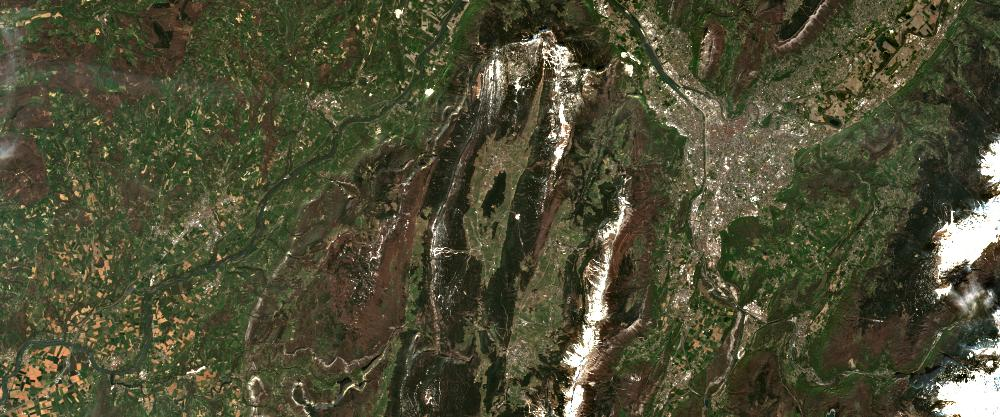

In [2]:
# Simple read with encode
datacube = Datacube(
    coverage_name="S2_L2A_32631_TCI_60m",
    index=[
        Subset("ansi", "2021-04-09"),
        Subset("E", 669960, 729960),
        Subset("N", 4990200, 5015220),
    ],
)  # ansi("2021-04-09"), E(669960:729960), N(4990200:5015220)

datacube = datacube.encode("image/jpeg")

Image(data=datacube.fetch())

c:\Users\dima1\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ows.rasdaman.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


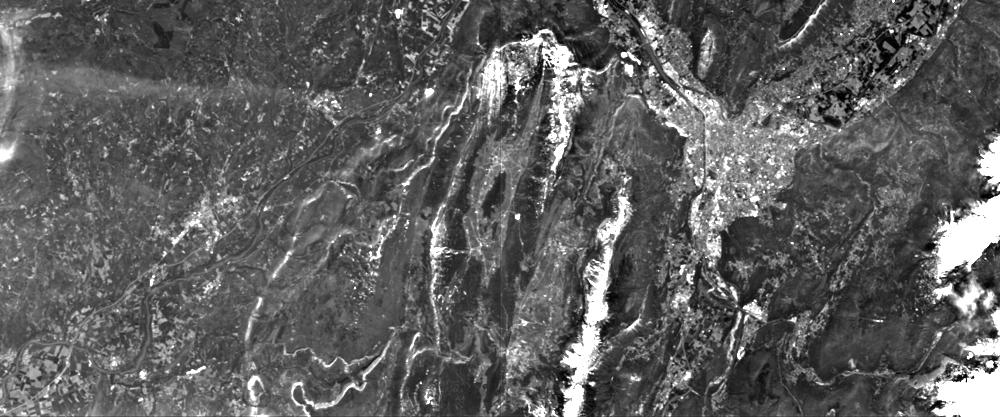

In [3]:
query = """
for $c in (S2_L2A_32631_B01_60m) 
return
  encode(
    ( 0.20 * ( 35.0 + (float) $c[ ansi( "2021-04-09" ), E( 669960:729960 ), N( 4990200:5015220 )])), "image/jpeg")
"""

# Send a WCPS query for evaluation on the rasdaman server; as WCPS queries usually contain
# special characters like '[', ']', '{', '}', it is necessary to send POST requests.
datacube = Datacube(
    coverage_name="S2_L2A_32631_B01_60m",
    index=[
        Subset("ansi", "2021-04-09"),
        Subset("E", 669960, 729960),
        Subset("N", 4990200, 5015220),
    ], # ansi( "2021-04-09"), E(669960:729960), N( 4990200:5015220)
)
b = ((datacube + 35.0) * 0.2).encode("image/jpeg")
Image(data=b.fetch())

c:\Users\dima1\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ows.rasdaman.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


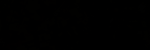

In [4]:
query = """
for $c0 in (S2_L2A_32631_TCI_60m),
    $c1 in (S2_L2A_32631_TCI_60m)
    let $index := [ansi( "2021-04-09" ), E( 670000:679000 ), N( 4990220:4993220 )]
return encode(($c0[ $index ])+($c1[ $index ]), "image/png")
"""
datacube = Datacube(
    coverage_name="S2_L2A_32631_TCI_60m",
    index=[
        Subset("ansi", "2021-04-09"),
        Subset("E", 670000, 679000),
        Subset("N", 4990220, 4993220),
    ], # ansi( "2021-04-09" ), E( 670000:679000 ), N( 4990220:4993220 )
)
d = (datacube + datacube).encode("image/png")
Image(data=d.fetch())

c:\Users\dima1\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ows.rasdaman.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


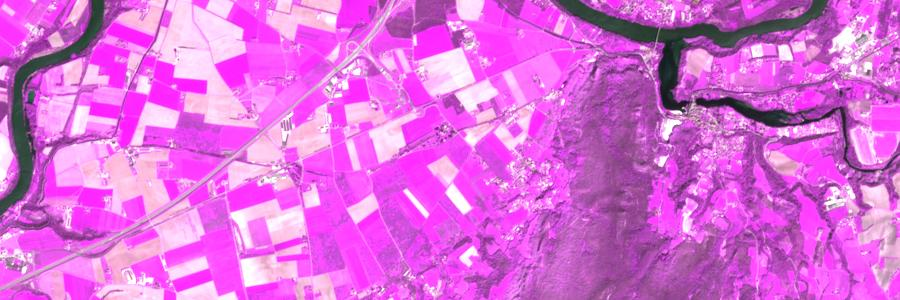

In [5]:
c = Datacube(
    coverage_name="S2_L2A_32631_B08_10m",
    index=[
        Subset("ansi", "2021-04-09"),
        Subset("E", 670000, 679000),
        Subset("N", 4990220, 4993220),
    ] # ansi( "2021-04-09" ), E( 670000:679000 ), N( 4990220:4993220 )
)
d = Datacube(
    coverage_name="S2_L2A_32631_B04_10m",
    index=[
        Subset("ansi", "2021-04-09"),
        Subset("E", 670000, 679000),
        Subset("N", 4990220, 4993220),
    ] # ansi( "2021-04-09" ), E( 670000:679000 ), N( 4990220:4993220 )
)
e = Datacube(
    coverage_name="S2_L2A_32631_B03_10m",
    index=[
        Subset("ansi", "2021-04-09"),
        Subset("E", 670000, 679000),
        Subset("N", 4990220, 4993220),
    ] # ansi( "2021-04-09" ), E( 670000:679000 ), N( 4990220:4993220 )
)
f = Datacube.refactor(
    [
        ("red", (c + d) * 1.0 * 10 / 10 / 17.0),
        ("green", (d + e) * 2.0 / 2 / 17.0),
        ("blue", (e + c) * 123.0 / 123 / 17.0),
    ]
).encode("image/jpeg")
Image(data=f.fetch())

In [6]:
# aggregated queires
datacube = Datacube(index=[
        Subset("ansi", "2021-04-09"),
        Subset("E", 670000, 679000),
        Subset("N", 4990220, 4993220),
    ] # ansi( "2021-04-09" ), E( 670000:679000 ), N( 4990220:4993220 )
    )

avg = datacube.avg([Subset('ansi', '2021-04-09')])
mn = datacube.min([Subset('ansi', '2021-04-09')])
mx = datacube.max([Subset('ansi', '2021-04-09')])
print(avg.fetch(), mn.fetch(), mx.fetch())

c:\Users\dima1\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ows.rasdaman.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\dima1\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ows.rasdaman.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\dima1\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ows.rasdaman.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.

b'<?xml version="1.0" encoding="UTF-8" standalone="yes"?>\n<ows:ExceptionReport version="2.0.1"\n    xsi:schemaLocation="http://www.opengis.net/ows/2.0 http://schemas.opengis.net/ows/2.0/owsExceptionReport.xsd"\n    xmlns:ows="http://www.opengis.net/ows/2.0" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xlink="http://www.w3.org/1999/xlink">\n    <ows:Exception exceptionCode="SyntaxError" >\n        <ows:ExceptionText><![CDATA[A parsing error occurred at line \'4\', column \'25\'. Offending token is \'[\'. Reason: no viable alternative at input \'avg(($f1)[[\'.]]></ows:ExceptionText>\n    </ows:Exception>\n</ows:ExceptionReport>\n' b'<?xml version="1.0" encoding="UTF-8" standalone="yes"?>\n<ows:ExceptionReport version="2.0.1"\n    xsi:schemaLocation="http://www.opengis.net/ows/2.0 http://schemas.opengis.net/ows/2.0/owsExceptionReport.xsd"\n    xmlns:ows="http://www.opengis.net/ows/2.0" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xlink="http://www.w3.org/199

c:\Users\dima1\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ows.rasdaman.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


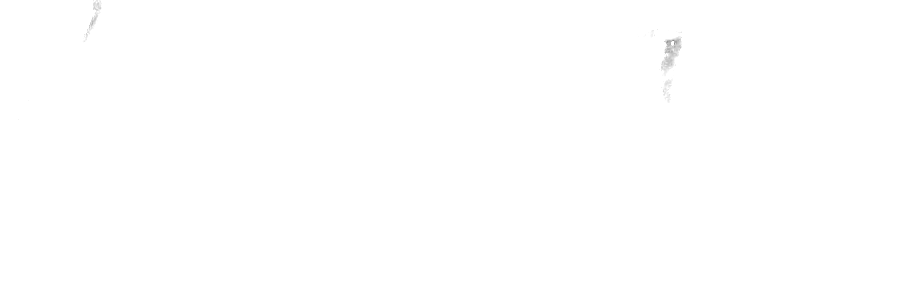

In [7]:
from wdc.tree.tree_parser import make_process_query_from_tree

# [] usage
datacube = Datacube(coverage_name="S2_L2A_32631_B08_10m")
b = (
    datacube[
        Subset("ansi", "2021-04-10"),
        Subset("E", 670000, 679000),
        Subset("N", 4990220, 4993220),
    ]
    + datacube[
        Subset("ansi", "2021-04-10"),
        Subset("E", 670000, 679000),
        Subset("N", 4990220, 4993220),
    ]
) / 2
b = b.encode("image/png")
Image(data=b.fetch())